In [1]:
import pandas as pd
from preprocessing_silo import get_imgs, rescale_img, clone_all, generate_new_data
import matplotlib.pyplot as plt
import cv2
import scipy.misc
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cPickle as pickle
import numpy as np

Using TensorFlow backend.


In [2]:
create_and_save_transformed_data = True
file_to_save_load = "generated_three_val.pickle"
project_directory = "~/Documents/others/kaggleCoursera/statoil"
model_name = ".model_weights_new1.hdf5"
learning_rate = 0.001
dropout = 0.2
epochs = 50
gen_data_per_image = 3

In [3]:
if create_and_save_transformed_data:
    train = pd.read_json(project_directory + "/data/train.json")

In [4]:
if create_and_save_transformed_data:
    reformated_imgs = get_imgs(train)
    labels = train['is_iceberg']
    x_train, x_valid, y_train, y_valid = train_test_split(reformated_imgs, labels, random_state=1, train_size=0.75)
    cloned_all_train, labels_train = clone_all(x_train, y_train)
    cloned_all_val, labels_val = clone_all(x_valid, y_valid)
    rescaled_cloned_all_train = rescale_img(cloned_all_train)
    rescaled_cloned_all_val = rescale_img(cloned_all_val)

In [7]:
if create_and_save_transformed_data:
    fit_data = np.concatenate((cloned_all_train,cloned_all_val))
    datagen = ImageDataGenerator(rotation_range=90,
                                 zoom_range=[0.8, 1.2],
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
    datagen.fit(fit_data)

In [8]:
if create_and_save_transformed_data:
    new_x_train, new_y_train = generate_new_data(rescaled_cloned_all_train, labels_train, gen_data_per_image, datagen)
    new_x_val, new_y_val = generate_new_data(rescaled_cloned_all_val, labels_val, gen_data_per_image, datagen)

In [10]:
if create_and_save_transformed_data:
    data = {'train_x':new_x_train, 'train_y':new_y_train, 'val_x':new_x_val, 'val_y':new_y_val}
    with open(file_to_save_load, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(file_to_save_load, 'rb') as handle:
        data = pickle.load(handle)
    new_x_train = data['train_x']
    new_y_train = data['train_y']
    new_x_val = data['val_x']
    new_y_val = data['val_y']

SystemError: error return without exception set

In [11]:
from models_silo import CNNfunctional
cnn_model2 = CNNfunctional(model_name, dropout=dropout, learning_rate=learning_rate, verbose=False)

In [ ]:
cnn_model2.fit_model(new_x_train, new_y_train, new_x_val, new_y_val, epochs=epochs)

Train on 19248 samples, validate on 6416 samples
Epoch 1/50
19248/19248 [==============================] - 648s - loss: 0.4922 - acc: 0.7402 - val_loss: 0.4081 - val_acc: 0.8117
Epoch 2/50
19248/19248 [==============================] - 642s - loss: 0.3581 - acc: 0.8350 - val_loss: 0.3544 - val_acc: 0.8498
Epoch 3/50
19248/19248 [==============================] - 609s - loss: 0.3315 - acc: 0.8487 - val_loss: 0.3482 - val_acc: 0.8579
Epoch 4/50
15432/19248 [=======================>......] - ETA: 108s - loss: 0.3129 - acc: 0.8607

120/120 [==============================] - 1s     
('Test loss:', 0.41453926761945087)
('Test accuracy:', 0.80833333730697632)


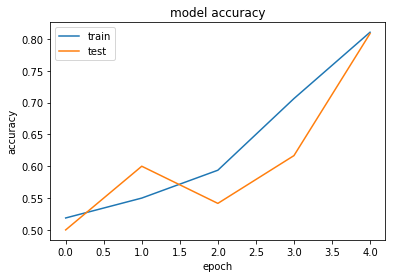

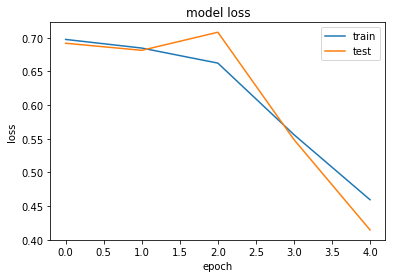

In [14]:
cnn_model2.evaluate_model(new_x_val, new_y_val)

In [15]:
test = pd.read_json(project_directory + "/data/test.json")
reformated_imgs_test = get_imgs(test)
rescaled_test = rescale_img(reformated_imgs_test)
ids = test['id']
cnn_model2.predict_from_model_and_write(rescaled_test, ids, 'sub_no_lim.csv')

In [ ]:
cnn_model2.predict_from_model_and_write(rescaled_test, ids, 'sub_lim.csv', 0.99, 0.01)